In [1]:
%matplotlib inline

import math

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../data/add_0_stations.csv')

In [22]:
df = data[data['count']>0]
len(df)
df["rate"] = df["Total"]/df["count"]
df = df.drop('ZIP', 1).drop('Total', 1)
df = df.dropna()

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
ndata = df.values
ndata[0:2]
df

,count,percent_male,MedianAge,percentCollegeDegree,MedianIncome,percent_own,rate
0,1,0.497188,19.4,0.6,0,0.000000,6402.000000
1,1,0.590426,29.1,0.0,31496,0.000000,752.000000
2,1,0.403981,19.4,0.7,0,0.000000,2562.000000
3,1,0.860294,22.0,1.9,35673,0.000000,952.000000
4,1,0.880000,41.0,0.0,0,0.000000,175.000000
5,1,0.374436,30.3,33.6,26541,0.000000,1330.000000
6,1,0.586395,36.3,0.0,7333,0.000000,735.000000
7,4,0.519026,19.2,0.6,12917,0.000000,1570.250000
8,2,0.753503,21.2,3.3,30696,0.000000,6637.000000
10,1,0.497114,30.2,80.9,45339,0.000000,2945.000000


In [27]:
split = math.floor(len(ndata)*0.8)
train = ndata[:split]
dev = ndata[split:]


In [28]:
def try_reggressor(regressor) :
    cols = 6
    regressor.fit(train[:,0:cols], train[:,cols])
    dev_predictions = regressor.predict(dev[:,0:cols])

    plt.plot(dev[:,cols], dev_predictions, 'r.')
    plt.show()

    _explained_variance_score = explained_variance_score(dev[:,cols], dev_predictions)
    _mean_absolute_error = mean_absolute_error(dev[:,cols], dev_predictions)
    _mean_squared_error = mean_squared_error(dev[:,cols], dev_predictions)
    _r2_score = r2_score(dev[:,cols], dev_predictions)
    print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score

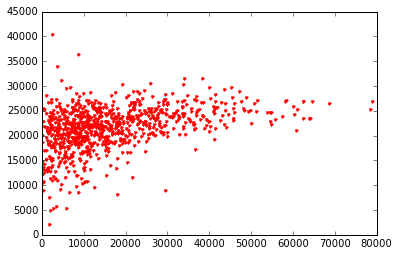

0.157794146014 11063.5623731 179442281.878 0.0189899007968


In [15]:
try_reggressor(LinearRegression())

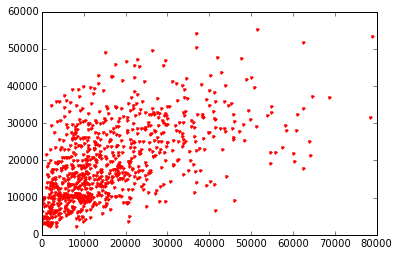

0.242902896263 9072.6469421 148039566.342 0.190668396863


In [16]:
try_reggressor(RandomForestRegressor())

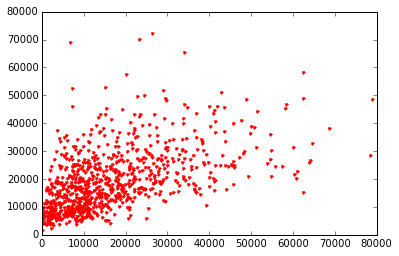

0.194319024658 9196.6915805 156198421.934 0.146063972255


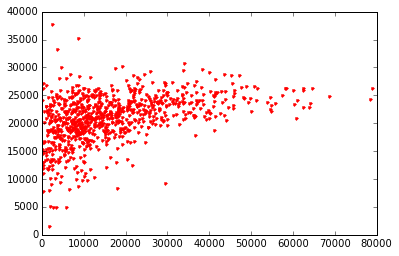

0.16922269498 10721.1413733 171200048.868 0.0640501493519


In [29]:
try_reggressor(RandomForestRegressor())
try_reggressor(LinearRegression())